IMPORT NECCESSSARY LIBRARIES

In [1]:
# Import necessary libraries for data manipulation and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import re  # Import the regular expressions module for pattern matching and text processing
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced data visualizations

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 
#import xgboost as xgb # For XGBoost Regression
from sklearn.model_selection import cross_validate  # To perform cross-validation
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics
from sklearn.model_selection import GridSearchCV   # For hyperparameter tuning


In [2]:
import matplotlib.pyplot as plt #For visualization
%matplotlib inline
import seaborn as sns

import category_encoders as ce                         #For target encoding
from sklearn.model_selection import train_test_split   #For splitting the data into train and test sets 
from sklearn.preprocessing import StandardScaler     #For scaling numerical features

# For Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
filepath = r"C:\Users\Special User\Downloads\African_crises_dataset.csv"

In [29]:
df = pd.read_csv(filepath)

In [7]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

OBSERVATIONS
Dataset has 14 columns and 1,059 rows, with no missing values
country_number: Likely an identifier for countries.
systemic_crisis: Target variable (1 = systemic crisis, 0 = no crisis).
independence: Indicator (1 = independent, 0 = not).
currency_crises: Indicator (1 = crisis, 0 = no crisis).
inflation_crises: Indicator (1 = crisis, 0 = no crisis).
domestic_debt_in_default: Indicator (1 = default, 0 = no default).
sovereign_external_debt_default: Indicator (1 = default, 0 = no default).

In [10]:
df['systemic_crisis'].value_counts()


systemic_crisis
0    977
1     82
Name: count, dtype: int64

OBSERVATIONS
The target variable systemic_crisis is highly imbalanced, with the majority class (0, no systemic crisis) making up 977 observations, while the minority class (1, systemic crisis) accounts for only 82 observations.

In [12]:
for col in ['country_code', 'country', 'banking_crisis']:
    print(col, df[col].unique())


country_code ['DZA' 'AGO' 'CAF' 'CIV' 'EGY' 'KEN' 'MUS' 'MAR' 'NGA' 'ZAF' 'TUN' 'ZMB'
 'ZWE']
country ['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']
banking_crisis ['crisis' 'no_crisis']


OBSERVATIONS
Both columns provide the same information in different formats, choose one and encode 
banking_crisis needs to be encoded 

In [13]:
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [14]:
 df.describe(include = 'object')

,country_code,country,banking_crisis
count,1059,1059,1059
unique,13,13,2
top,EGY,Egypt,no_crisis
freq,155,155,965


UNIVARIATE ANALYSIS

In [ ]:
# Set up plotting style
sns.set(style="whitegrid")

# Categorical Variables Univariate Analysis
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through categorical columns for count plots
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

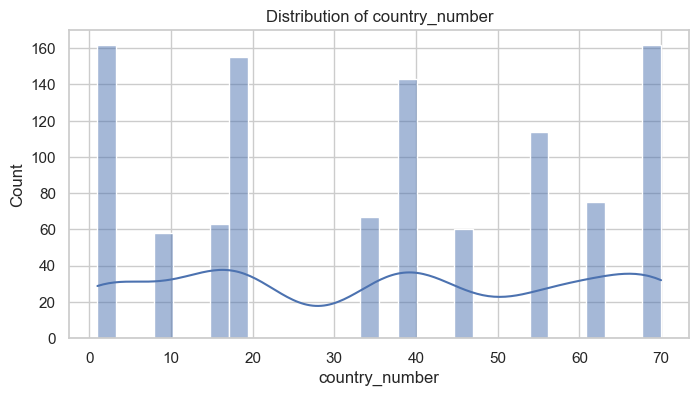

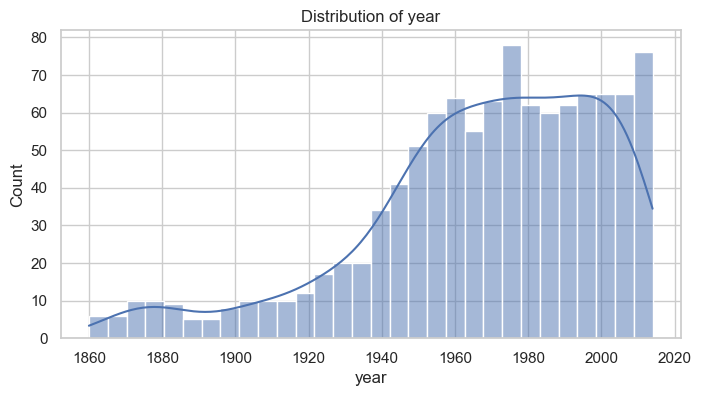

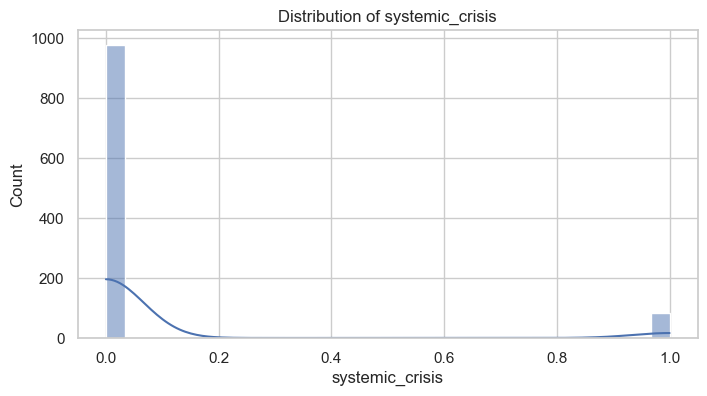

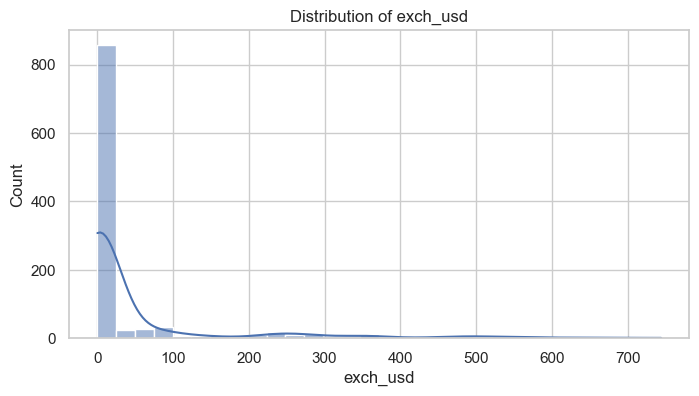

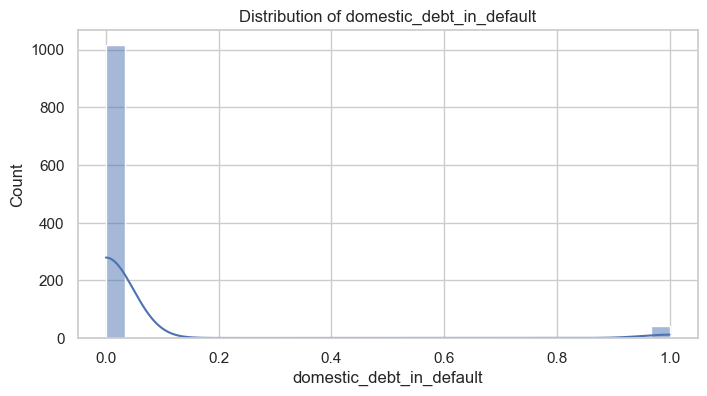

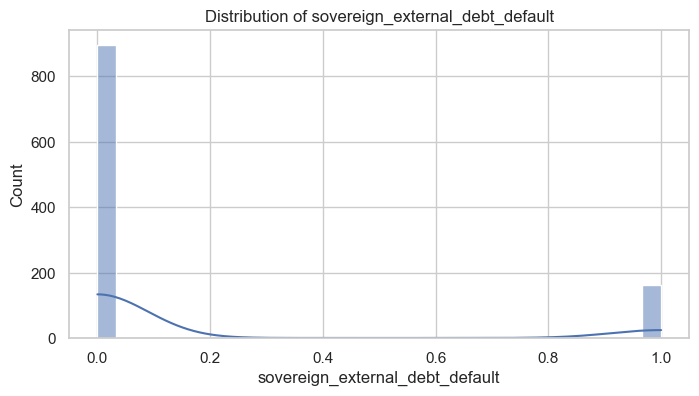

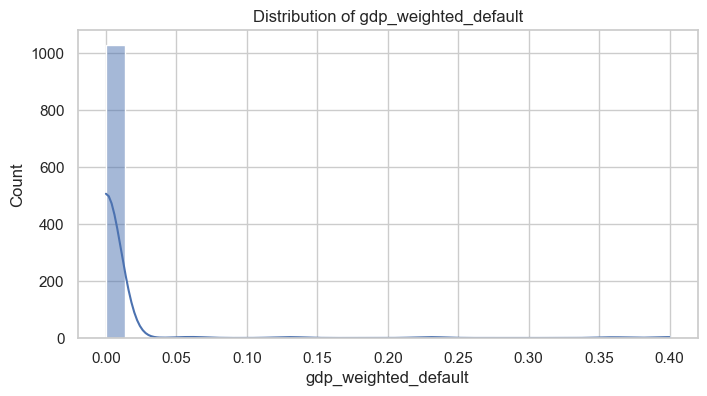

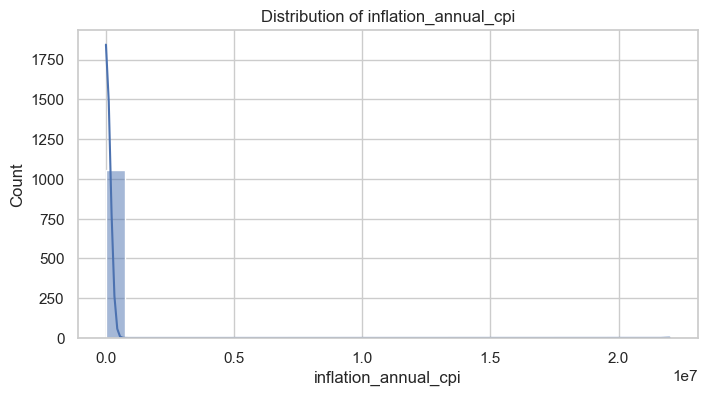

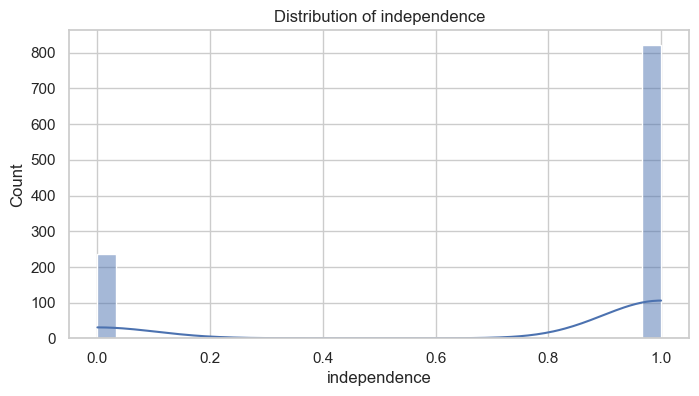

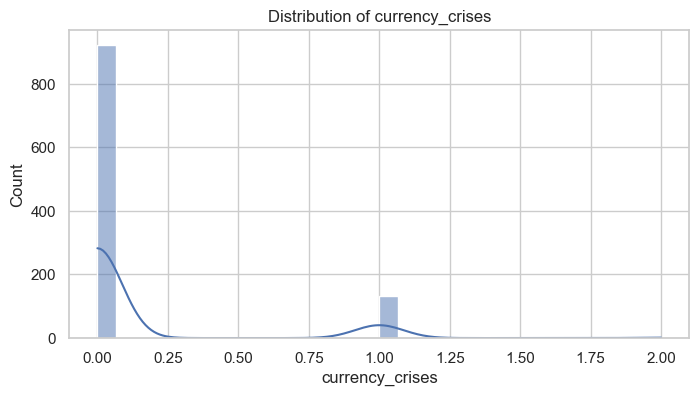

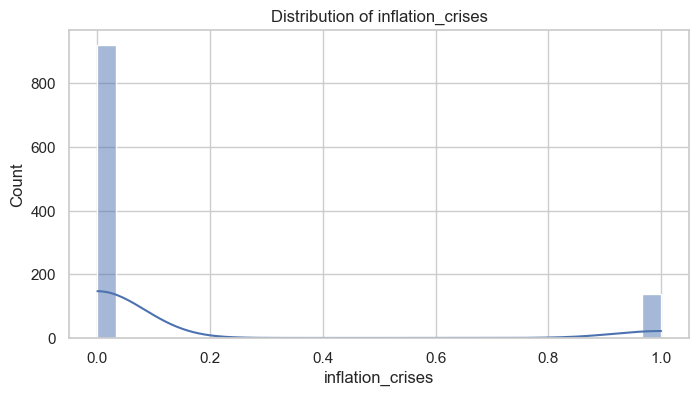

In [17]:
# Numerical Variables Univariate Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through numerical columns for histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
BIVARIATE ANALYSIS

<Figure size 800x400 with 0 Axes>

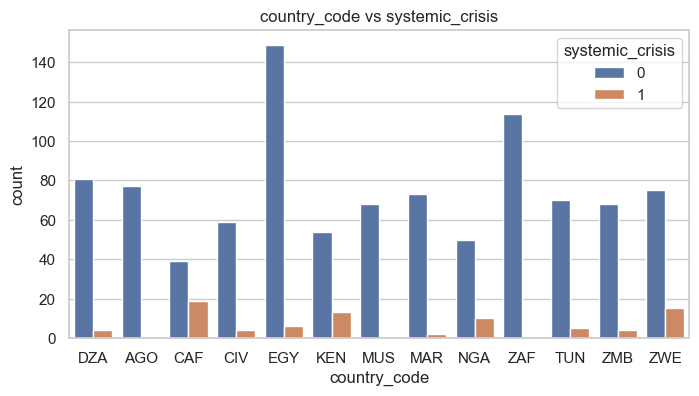

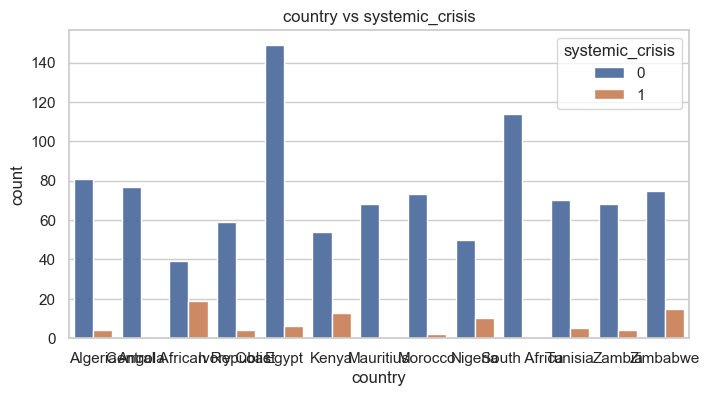

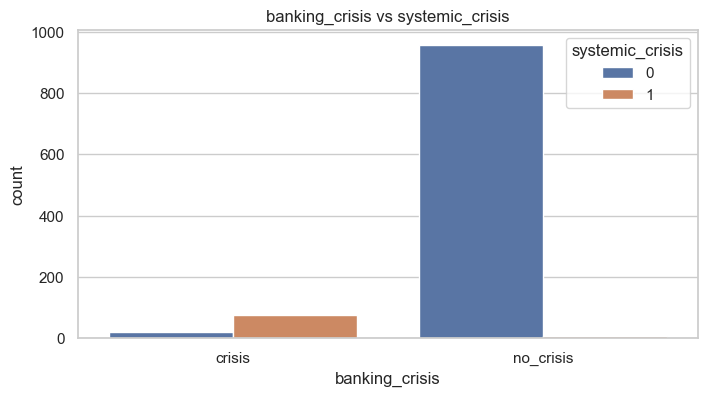

In [19]:
# Bivariate Analysis with Categorical Variables vs Target Variable
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='systemic_crisis')
    plt.title(f'{col} vs systemic_crisis')
    plt.show()

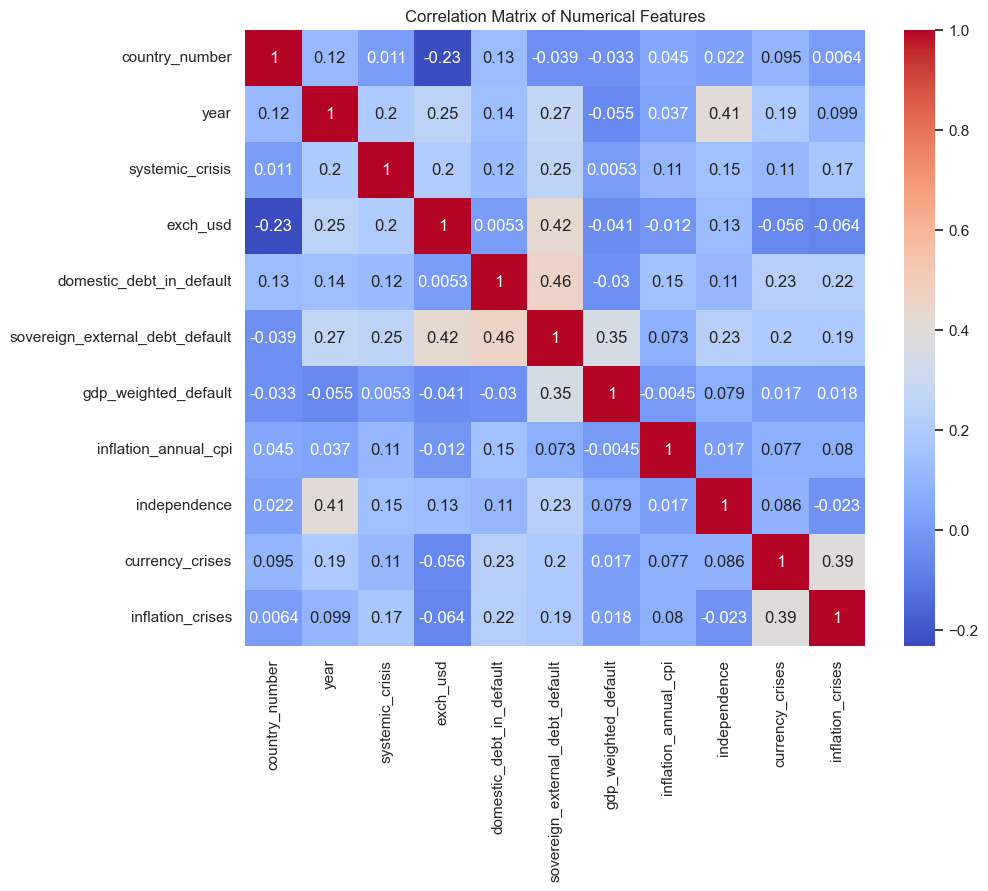

In [20]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

OBSERVATIONS
domestic_debt_in_default and sovereign_external_debt_default have a strong positive correlation (~0.46).
gdp_weighted_default has weak correlations with most variables.
systemic_crisis seems weakly correlated with most features, potentially indicating that no single predictor dominates its determination.

In [30]:
#trying to log transform exch and inflation annual because of the extreme outliers
# Adding a small constant to avoid log(0) issues
df['log_exch_usd'] = np.log1p(df['exch_usd'])  # log1p is log(1 + x)
df['log_inflation_annual_cpi'] = np.log1p(df['inflation_annual_cpi'])

In [31]:
#encoding banking crisis
categorical_cols = ["banking_crisis"]

# Apply one-hot encoding to the categorical columns
# - pd.get_dummies creates binary columns for each category in the categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

# Set option to display all the columns
pd.set_option("display.max_columns", None)

In [32]:
# Drop irrelevant columns and separate features (X) and target (y)
X = df.drop(columns=["country_code", "country_number", "country", "year", "systemic_crisis", "exch_usd", "gdp_weighted_default",
                     "inflation_annual_cpi"])  # Features
y = df["systemic_crisis"]  # Target variable

In [33]:
# Split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.isnull().sum())


domestic_debt_in_default            0
sovereign_external_debt_default     0
independence                        0
currency_crises                     0
inflation_crises                    0
log_exch_usd                        0
log_inflation_annual_cpi           83
banking_crisis_crisis               0
banking_crisis_no_crisis            0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Use 'median' or 'most_frequent' as needed
X_train['log_inflation_annual_cpi'] = imputer.fit_transform(X_train[['log_inflation_annual_cpi']])


In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [45]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [46]:
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())


NaN values in X_train_scaled: 0
NaN values in X_test_scaled: 21


In [47]:
import numpy as np

# Count missing values in each column
print(np.isnan(X_test_scaled).sum(axis=0))  # Sum NaNs per column

# Check if there are any NaN values
print(np.isnan(X_test_scaled).any())



[ 0  0  0  0  0  0 21  0  0]
True


In [48]:
imputer = SimpleImputer(strategy='median')

X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


In [49]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=40, max_iter=1000)

# Train the model
logistic_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set and evaluate
y_pred = logistic_model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9858490566037735
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.89      0.94      0.91        17

    accuracy                           0.99       212
   macro avg       0.94      0.97      0.95       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
 [[193   2]
 [  1  16]]


XGBOOST doesnt require scaling so i will refer to my smoting directly.

In [51]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgboost_model = XGBClassifier(random_state=40)

# Train the model
xgboost_model.fit(X_train_smote, y_train_smote)

# Predict on the test set and evaluate
y_pred = xgboost_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9858490566037735
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.94      0.88      0.91        17

    accuracy                           0.99       212
   macro avg       0.96      0.94      0.95       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:
 [[194   1]
 [  2  15]]


In [52]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
    'max_depth': [3, 5, 7],                  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],           # Minimum sum of weights of all child nodes
    'subsample': [0.8, 1.0],                 # Fraction of samples used for fitting
    'colsample_bytree': [0.8, 1.0],          # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                  # Minimum loss reduction for splitting
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',                      # Optimize for F1-Score (macro)
    cv=5,                                    # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                                # Use all CPU cores
)

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Best F1 Score: 0.989128874079564


In [53]:
# Train the final model with the best parameters
best_params = {
    'colsample_bytree': 1.0,
    'gamma': 0.2,
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 50,
    'subsample': 0.8
}

final_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions on the test set
y_test_pred = final_model.predict(X_test)

# Evaluate performance
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Accuracy Score: 0.9905660377358491

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       195
           1       1.00      0.88      0.94        17

    accuracy                           0.99       212
   macro avg       0.99      0.94      0.97       212
weighted avg       0.99      0.99      0.99       212


Confusion Matrix:
 [[195   0]
 [  2  15]]
